In [1]:
# use cvpr_edts env
import_library = True

if import_library:

    import os
    import ast
    from pathlib import Path

    import pandas as pd
    import numpy as np

    from shapely import wkt
    from shapely.geometry import MultiPolygon

    import pandas as pd
    import numpy as np
    from shapely import wkt
    from shapely.geometry import MultiPolygon
    from collections import defaultdict
    import json
    import uuid
    from collections import Counter

    import sys
    from topologicpy.Vertex import Vertex
    from topologicpy.Edge import Edge
    from topologicpy.Wire import Wire
    from topologicpy.Face import Face
    from topologicpy.Shell import Shell
    from topologicpy.Cell import Cell
    from topologicpy.CellComplex import CellComplex
    from topologicpy.Cluster import Cluster
    from topologicpy.Topology import Topology
    from topologicpy.Dictionary import Dictionary
    from topologicpy.Color import Color
    from topologicpy.Plotly import Plotly
    from topologicpy.EnergyModel import EnergyModel
    from topologicpy.Topology import Topology

    import utils.energyplus_utils as uep


In [2]:
folders_definition = True

if folders_definition:

    import plotly.graph_objects as go
    import pandas as pd
    import plotly.graph_objects as go
    from shapely import wkt
    from shapely.geometry import MultiPolygon

    current_directory = Path.cwd()
    name = 'first_floor_v13'

    data_folder = current_directory.parents[0] / 'data'

    csv_folder = current_directory / 'outputs' / 'jsons'
    csv_file = csv_folder / f'{name}.csv'
    print(f'csv_file {csv_file}')

    weather_file_path = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\DATA_\weather_data\first_floor.epw"
    design_day_file_path = r'c:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\DATA_\weather_data\ITA_TT_Trento.AP.160230_TMYx.2009-2023.ddy'
    os_binary_path = r"C:\openstudio-3.7.0\bin"

    output_folder = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\outputs\weather_outputs"
    building_path = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\brep_by_surface_type\building_full.brep"
    
    def check_and_load_brep(path_str):
        path = Path(path_str)
        if not path.exists():
            print(f"❌ File does not exist: {path}")
            return None
        topology = Topology.ByBREPPath(str(path))
        if not topology:
            print(f"⚠️ Failed to load valid BREP: {path}")
        else:
            print(f"✅ Successfully loaded: {path}")
        return topology
    
    

    df = pd.read_csv(csv_file)
    print(f"Reading file: {csv_file}")

    df['geometry_wkt'] = df['geometry_wkt'].astype(str)
    df_plot = df[df['geometry_wkt'].str.contains('MULTIPOLYGON Z', na=False)]
    print(f"Total geometries found: {len(df_plot)}")

    from shapely.geometry import MultiPolygon, Polygon

    def extract_coords(wkt_str):
        try:
            geom = wkt.loads(wkt_str)
            coords = []
            if isinstance(geom, MultiPolygon):
                for polygon in geom.geoms:
                    coords.extend(polygon.exterior.coords)
            elif isinstance(geom, Polygon):
                coords.extend(geom.exterior.coords)
            return coords
        except Exception:
            return None

    for i, row in df_plot.head(2).iterrows():
        print("Geometry preview:", row['geometry_wkt'][:100])
        coords = extract_coords(row['geometry_wkt'])
        print("Coords extracted:", coords)

    print(f"Total geometries found: {len(df_plot)}")

    fig = go.Figure()

    for _, row in df_plot.iterrows():
        coords = extract_coords(row['geometry_wkt'])
        if coords:
            x, y, z = zip(*coords)
            thematic = row['thematic_surface']
            eid = row['element_id']

            if thematic in ['door', 'window']:
                fig.add_trace(go.Scatter3d(
                    x=x, y=y, z=z,
                    mode='lines',
                    name=f"{thematic} ({eid})",
                    line=dict(width=4)
                ))
            else:
                fig.add_trace(go.Scatter3d(
                    x=x, y=y, z=z,
                    mode='lines',
                    name=f"{thematic} ({eid})",
                    line=dict(width=2)
                ))

    fig.update_layout(
        title="3D Visualization of Thamtic Surface Model with Openings",
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        width=1400,
        height=900,
        showlegend=True
    )

    html_output_path = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\filtered_with_openings.html"
    html_output_path = os.path.join(Path.cwd(), 'outputs', 'filtered_with_openings.html')
    fig.write_html(html_output_path)

    print(f"3D plot with real ratio and openings saved to: {html_output_path}")
    print(df['geometry_wkt'].head(10).to_list())
    print(df.columns.tolist())


csv_file c:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\first_floor_v13.csv
Reading file: c:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\first_floor_v13.csv
Total geometries found: 227
Geometry preview: MULTIPOLYGON Z (((-39.014 22.381 6.657, -39.119 29.884 6.657, -39.119 29.884 3.052, -39.014 22.381 3
Coords extracted: [(-39.014, 22.381, 6.657), (-39.119, 29.884, 6.657), (-39.119, 29.884, 3.052), (-39.014, 22.381, 3.052), (-39.014, 22.381, 6.657)]
Geometry preview: MULTIPOLYGON Z (((-39.119 29.884 6.657, -31.666 29.983 6.657, -31.666 29.983 3.052, -39.119 29.884 3
Coords extracted: [(-39.119, 29.884, 6.657), (-31.666, 29.983, 6.657), (-31.666, 29.983, 3.052), (-39.119, 29.884, 3.052), (-39.119, 29.884, 6.657)]
Total geometries found: 227
3D plot with real ratio and openings saved to: c:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\filtered_with_openings.html
['n

In [3]:
extracting_geometries_dcel = True

if extracting_geometries_dcel:

    import pandas as pd
    import numpy as np
    from shapely.wkt import loads as load_wkt
    from shapely.geometry import Polygon, MultiPolygon
    from collections import namedtuple, defaultdict

    df = pd.read_csv(csv_file)

    df_element_id = df[df['element_id'].notna()].copy()

    df_walls_external = df[df['thematic_surface'].isin(['external'])].copy()
    df_walls_internal = df[df['thematic_surface'].isin(['party_wall'])].copy()
    df_closure = df[df['thematic_surface'].isin(['closure'])].copy()

    df_extrnal_with_holes =  df[df['thematic_surface'].isin(['external_with_holes'])].copy()
    df_internal_with_holes = df[df['thematic_surface'].isin(['party_with_holes'])].copy()

    floors = df[df['thematic_surface'].isin(['floor'])].copy()
    ceilings = df[df['thematic_surface'].isin(['ceiling'])].copy()

    doors = df[df['thematic_surface'].isin(['door'])].copy()
    openings = df[df['thematic_surface'].isin(['window'])].copy()

    df_room =  df[df['thematic_surface'].isin(['room'])].copy()

    solid_surface_types = ['external', 'party_wall', 'floor', 'ceiling', 'closure']
    thematic_surface_types = [
        'external', 'party_wall',
        'external_with_hole', 'party_with_hole',
        'closure', 'floor', 'ceiling', 'door', 'window'
    ]

    def snap(coord, decimals=5):
        return tuple(np.round(coord[:2], decimals)) + (round(coord[2], decimals),)

    def prefer_with_holes(subdf: pd.DataFrame) -> pd.DataFrame:
        winners = []
        for _, grp in subdf.groupby('element_gml_id'):
            with_hole = grp[grp['thematic_surface'].str.contains('_with_hole')]
            winners.append(with_hole if not with_hole.empty else grp)
        return pd.concat(winners)

    def extract_base_solid(wkt_str, surface_type, tolerance=1e-5):
        try:
            geom = load_wkt(wkt_str)
            if isinstance(geom, MultiPolygon):
                geom = geom.geoms[0]
            if not isinstance(geom, Polygon):
                return [], None, None

            coords = list(geom.exterior.coords)
            if len(coords) < 3:
                return [], None, None

            z_vals = [pt[2] for pt in coords]
            z_min = min(z_vals)
            z_max = max(z_vals)

            base_pts = [snap(pt) for pt in coords if abs(pt[2] - z_min) < tolerance]
            if len(base_pts) < 3:
                return [], None, None

            tagged_edges = [((base_pts[i], base_pts[(i + 1) % len(base_pts)]), surface_type)
                            for i in range(len(base_pts))]

            return tagged_edges, z_min, z_max
        except Exception:
            return [], None, None

    solid_surface_types = ['external', 'party_wall', 'floor', 'ceiling', 'closure']

    thematic_surface_types = [
        'external', 'party_wall', 'external_with_hole', 'party_with_hole',
        'closure', 'floor', 'ceiling', 'door', 'window'
    ]

    df_valid = df[df['geometry_wkt'].notna()].copy()
    df_elements_ts = prefer_with_holes(df_valid[df_valid['thematic_surface'].isin(thematic_surface_types)])

    df_solid = df_elements_ts[df_elements_ts['thematic_surface'].isin(solid_surface_types)].copy()
    dcel_data_by_pid = defaultdict(lambda: {
        "DCEL constructor": [],
        "zmins": [],
        "zmaxs": [],
        "geometry_wkts": []
    })

    for _, row in df_solid.iterrows():
        pid = row["parent_id"]
        base_loop_with_tags, zmin, zmax = extract_base_solid(row["geometry_wkt"], row["thematic_surface"])
        if base_loop_with_tags:
            dcel_data_by_pid[pid]["element_id"] = row["element_id"]  # ✅ Add this
            dcel_data_by_pid[pid]["DCEL constructor"].append(base_loop_with_tags)
            dcel_data_by_pid[pid]["zmins"].append(zmin)
            dcel_data_by_pid[pid]["zmaxs"].append(zmax)
            dcel_data_by_pid[pid]["geometry_wkts"].append(row["geometry_wkt"])

    vertex_ = namedtuple("vertex", ["x", "y"])
    half_edge = namedtuple("half_edge", ["origin", "twin", "next", "prev", "face", "surface_type"])
    face_ = namedtuple("face", ["outer_component", "edges"])

    all_dcel_by_pid = {}

    for pid, entry in dcel_data_by_pid.items():
        vertex_index = {}
        vertices = []
        half_edges = []
        faces = []

        def get_vertex_index(pt):
            pt_2d = pt[:2]
            if pt_2d not in vertex_index:
                idx = len(vertices)
                vertex_index[pt_2d] = idx
                vertices.append(vertex_(pt_2d[0], pt_2d[1]))
            return vertex_index[pt_2d]

        for tagged_loop in entry["DCEL constructor"]:
            edge_objs = {}
            edge_keys = []

            for (start, end), surface_type in tagged_loop:
                i_start = get_vertex_index(start)
                i_end = get_vertex_index(end)
                edge_key = (i_start, i_end)

                edge = half_edge(
                    origin=i_start,
                    twin=None,
                    next=None,
                    prev=None,
                    face=None,
                    surface_type=surface_type
                )

                edge_objs[edge_key] = edge
                edge_keys.append(edge_key)

            n = len(edge_keys)
            for i in range(n):
                cur = edge_keys[i]
                nxt = edge_keys[(i + 1) % n]
                prv = edge_keys[(i - 1 + n) % n]
                edge_objs[cur] = edge_objs[cur]._replace(next=nxt, prev=prv)

            for (start, end), edge in edge_objs.items():
                twin_key = (end, start)
                if twin_key in edge_objs:
                    edge = edge._replace(twin=twin_key)
                    edge_objs[(start, end)] = edge

            face = face_(outer_component=edge_keys[0], edges=edge_keys)
            faces.append(face)
            half_edges.extend(edge_objs.values())

        all_dcel_by_pid[pid] = {
            "element_id": entry.get("element_id", None),
            "vertices": vertices,
            "half_edges": half_edges,
            "faces": faces,
            "geometry_wkts": entry["geometry_wkts"],
            "z_min": min(entry["zmins"]),
            "z_max": max(entry["zmaxs"])
        }

    all_dcel_by_pid

    visual_dcel_check = False

    if visual_dcel_check:

        import matplotlib.pyplot as plt
        import matplotlib.patches as patches
        import math

        def plot_dcel(pid, dcel, ax=None):
            if ax is None:
                fig, ax = plt.subplots(figsize=(6, 6))

            verts = dcel["vertices"]
            faces = dcel["faces"]

            for face in faces:
                edge_keys = face.edges
                if not edge_keys:
                    continue
                polygon = []
                for (start_idx, end_idx) in edge_keys:
                    start_v = verts[start_idx]
                    polygon.append((start_v.x, start_v.y))
                # Ensure loop closure
                if polygon and polygon[0] != polygon[-1]:
                    polygon.append(polygon[0])

                poly_patch = patches.Polygon(polygon, closed=True, fill=False, edgecolor='blue')
                ax.add_patch(poly_patch)

            ax.set_title(f'DCEL Face Loops for PID {pid}')
            ax.set_aspect('equal')
            ax.autoscale_view()

            return ax

        # Plot one figure per DCEL
        figures = []
        for pid, dcel in list(all_dcel_by_pid.items())[:10]:  # Limit to first 10 for practicality
            fig, ax = plt.subplots(figsize=(6, 6))
            plot_dcel(pid, dcel, ax=ax)
            ax.set_title(f'DCEL for PID {pid}')
            figures.append(fig)

        plt.show()


In [4]:
solid_topo_model = True

if solid_topo_model:

    solid_cells = []

    for pid, dcel in all_dcel_by_pid.items():
        
        z_min = dcel["z_min"]
        z_max = dcel["z_max"]
        vertices = dcel["vertices"]
        faces = dcel["faces"]

        vertex_objs_base = [Vertex.ByCoordinates(v.x, v.y, z_min) for v in vertices]
        vertex_objs_top = [Vertex.ByCoordinates(v.x, v.y, z_max) for v in vertices]

        for face in faces:
            edge_sequence_base = []
            edge_sequence_top = []
            vertical_faces = []

            for (start_idx, end_idx) in face.edges:
                if start_idx == end_idx:
                    continue  

                vb1 = vertex_objs_base[start_idx]
                vb2 = vertex_objs_base[end_idx]
                vt1 = vertex_objs_top[start_idx]
                vt2 = vertex_objs_top[end_idx]

                eb = Edge.ByStartVertexEndVertex(vb1, vb2)
                et = Edge.ByStartVertexEndVertex(vt1, vt2)

                if eb: edge_sequence_base.append(eb)
                if et: edge_sequence_top.append(et)

                e1 = Edge.ByStartVertexEndVertex(vb1, vt1)
                e2 = Edge.ByStartVertexEndVertex(vt1, vt2)
                e3 = Edge.ByStartVertexEndVertex(vt2, vb2)
                e4 = Edge.ByStartVertexEndVertex(vb2, vb1)
                vertical_wire = Wire.ByEdges([e1, e2, e3, e4])
                if vertical_wire:
                    f_side = Face.ByWire(vertical_wire)
                    if f_side:
                        vertical_faces.append(f_side)

            base_face = Face.ByWire(Wire.ByEdges(edge_sequence_base)) if len(edge_sequence_base) >= 3 else None
            top_face = Face.ByWire(Wire.ByEdges(edge_sequence_top)) if len(edge_sequence_top) >= 3 else None

            face_group = [f for f in [base_face, top_face] if f] + vertical_faces
            shell = Shell.ByFaces(face_group)
            if shell:
                cell = Cell.ByShell(shell)
                if cell:
                    solid_cells.append(cell)

    if solid_cells:
        solid_cell_complex = CellComplex.ByCells(solid_cells)
        print(f"✅ Created solid CellComplex with {len(solid_cells)} cells (should match number of unique DCEL loops)")
    else:
        print("⚠️ No valid cells were created.")


    from hashlib import sha1

    def hash_cell(cell):
        """Create a hash based on the cell's topology (vertices coordinates)"""
        verts = Cell.Vertices(cell)
        coords = sorted([(round(Vertex.X(v), 6), round(Vertex.Y(v), 6), round(Vertex.Z(v), 6)) for v in verts])
        return sha1(str(coords).encode()).hexdigest()

    seen_hashes = set()
    unique_solid_cells = []

    for cell in solid_cells:
        h = hash_cell(cell)
        if h not in seen_hashes:
            seen_hashes.add(h)
            unique_solid_cells.append(cell)

    if unique_solid_cells:
        solid_cell_complex = CellComplex.ByCells(unique_solid_cells)
        print(f"✅ Created unique solid CellComplex with {len(unique_solid_cells)} cells")
    else:
        print("⚠️ No valid unique cells were created.")

plot_final_cellcomplex = True

if plot_final_cellcomplex:

    import plotly.graph_objects as go
    from itertools import cycle
    import math

    def triangulate_loop(ordered_coords):
        """
        Fan triangulation: assumes coords are in CCW or CW order.
        """
        if len(ordered_coords) < 3:
            return [], []
        
        triangles = []
        for i in range(1, len(ordered_coords) - 1):
            triangles.append((0, i, i + 1))
        return ordered_coords, triangles

    def plot_dcel_3d_with_colormap(all_dcel_by_pid, height_scale=1.0):
        fig = go.Figure()
        
        # Generate a smooth colormap using HSL color space
        def hsl_color(i, total):
            hue = (i / total) * 360
            return f"hsl({int(hue)},80%,70%)"
        
        total_cells = len(all_dcel_by_pid)
        
        for cell_index, (pid, dcel) in enumerate(all_dcel_by_pid.items()):
            verts2d = dcel["vertices"]
            z_min = dcel["z_min"]
            z_max = dcel["z_max"]
            z_diff = (z_max - z_min) * height_scale
            faces = dcel["faces"]

            vert_map = {}  # Global 3D vertex map for the mesh
            vertex_list = []
            idx_counter = 0
            triangles = []

            def add_vertex(coord3d):
                key = tuple(round(c, 6) for c in coord3d)
                nonlocal idx_counter
                if key not in vert_map:
                    vert_map[key] = idx_counter
                    vertex_list.append(key)
                    idx_counter += 1
                return vert_map[key]

            for face in faces:
                base_loop = [(verts2d[start_idx].x, verts2d[start_idx].y, z_min) for (start_idx, _) in face.edges]
                top_loop = [(x, y, z_min + z_diff) for (x, y, _) in base_loop]

                for loop in [base_loop, top_loop]:
                    coords, tris = triangulate_loop(loop)
                    for tri in tris:
                        a = add_vertex(coords[tri[0]])
                        b = add_vertex(coords[tri[1]])
                        c = add_vertex(coords[tri[2]])
                        triangles.append((a, b, c))

                # Create vertical side faces between base and top
                for (start_idx, end_idx) in face.edges:
                    vb1 = verts2d[start_idx]
                    vb2 = verts2d[end_idx]
                    base1 = (vb1.x, vb1.y, z_min)
                    base2 = (vb2.x, vb2.y, z_min)
                    top2 = (vb2.x, vb2.y, z_min + z_diff)
                    top1 = (vb1.x, vb1.y, z_min + z_diff)

                    a = add_vertex(base1)
                    b = add_vertex(base2)
                    c = add_vertex(top2)
                    d = add_vertex(top1)

                    # Two triangles for each quad
                    triangles.append((a, b, c))
                    triangles.append((a, c, d))

            if not vertex_list or not triangles:
                continue

            x, y, z = zip(*vertex_list)
            i, j, k = zip(*triangles)

            fig.add_trace(go.Mesh3d(
                x=x, y=y, z=z,
                i=i, j=j, k=k,
                opacity=0.85,
                color=hsl_color(cell_index, total_cells),
                flatshading=True,
                name=f"CELLCOMPLEX {pid}"
            ))

        fig.update_layout(
            title="DCEL-Based Solid Visualization with Color Scale",
            scene=dict(aspectmode='data'),
            showlegend=False,
            paper_bgcolor='white',
            scene_bgcolor='white'
        ),

        fig.show()

plot_dcel_3d_with_colormap(all_dcel_by_pid)


Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation failed. Returning None.
Cell.ByFaces - Error: The operation fail

c:\path\to\your\envs\cvpr_edts\lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [5]:
room_geometry_data = {}

for pid, dcel in all_dcel_by_pid.items():

    verts2d = dcel["vertices"]
    z_min = dcel["z_min"]
    z_max = dcel["z_max"]
    faces = dcel["faces"]
    element_id = dcel.get("element_id", None)  # <-- safely get element_id

    vertex_map = {}
    vertex_list = []
    triangles = []
    idx_counter = [0]  # wrap in list to allow mutation in inner function

    def add_vertex(coord3d):
        key = tuple(round(c, 6) for c in coord3d)
        if key not in vertex_map:
            vertex_map[key] = idx_counter[0]
            vertex_list.append(key)
            idx_counter[0] += 1
        return vertex_map[key]

    def fan_triangulate(loop):
        for i in range(1, len(loop) - 1):
            a = add_vertex(loop[0])
            b = add_vertex(loop[i])
            c = add_vertex(loop[i + 1])
            triangles.append([a, b, c])

    for face in faces:
        base_loop = [(verts2d[start_idx].x, verts2d[start_idx].y, z_min) for (start_idx, _) in face.edges]
        top_loop = [(x, y, z_max) for (x, y, _) in base_loop]

        fan_triangulate(base_loop)
        fan_triangulate(top_loop)

        for (start_idx, end_idx) in face.edges:
            vb1 = verts2d[start_idx]
            vb2 = verts2d[end_idx]
            base1 = (vb1.x, vb1.y, z_min)
            base2 = (vb2.x, vb2.y, z_min)
            top2 = (vb2.x, vb2.y, z_max)
            top1 = (vb1.x, vb1.y, z_max)

            a = add_vertex(base1)
            b = add_vertex(base2)
            c = add_vertex(top2)
            d = add_vertex(top1)

            triangles.append([a, b, c])
            triangles.append([a, c, d])

    room_geometry_data[pid] = {
        "element_id": element_id,
        "z_min": z_min,
        "z_max": z_max,
        "geometry_vertices": vertex_list,
        "geometry_faces": triangles,
        "geometry_wkts": dcel["geometry_wkts"],
        "num_faces": len(faces),
        "num_vertices": len(vertex_list)
    }

room_geometry_data

{198: {'element_id': 206,
  'z_min': 3.052,
  'z_max': 6.657,
  'geometry_vertices': [(-33.66, 19.021, 3.052),
   (-33.649, 18.468, 3.052),
   (-33.66, 19.021, 6.657),
   (-33.649, 18.468, 6.657),
   (-35.122, 18.987, 3.052),
   (-35.122, 18.987, 6.657),
   (-35.625, 18.975, 3.052),
   (-35.589, 16.664, 3.052),
   (-33.617, 16.692, 3.052),
   (-35.625, 18.975, 6.657),
   (-35.589, 16.664, 6.657),
   (-33.617, 16.692, 6.657)],
  'geometry_faces': [[0, 1, 0],
   [2, 3, 2],
   [0, 1, 3],
   [0, 3, 2],
   [1, 0, 2],
   [1, 2, 3],
   [0, 0, 2],
   [0, 2, 2],
   [4, 0, 4],
   [5, 2, 5],
   [4, 0, 2],
   [4, 2, 5],
   [0, 4, 5],
   [0, 5, 2],
   [4, 4, 5],
   [4, 5, 5],
   [6, 7, 8],
   [6, 8, 1],
   [6, 1, 0],
   [6, 0, 4],
   [6, 4, 6],
   [9, 10, 11],
   [9, 11, 3],
   [9, 3, 2],
   [9, 2, 5],
   [9, 5, 9],
   [6, 7, 10],
   [6, 10, 9],
   [7, 8, 11],
   [7, 11, 10],
   [8, 1, 3],
   [8, 3, 11],
   [1, 0, 2],
   [1, 2, 3],
   [0, 4, 5],
   [0, 5, 2],
   [4, 6, 9],
   [4, 9, 5],
   [6, 6, 9

In [6]:
thematic_model_complete = True

if thematic_model_complete:

    from shapely.wkt import loads as load_wkt
    from shapely.geometry import Polygon, MultiPolygon
    import numpy as np

    def prefer_with_holes(subdf):
        winners = []
        for _, grp in subdf.groupby('element_gml_id'):
            with_hole = grp[grp['thematic_surface'].str.contains('_with_hole')]
            winners.append(with_hole if not with_hole.empty else grp)
        return pd.concat(winners)

    thematic_surface_types = [
        'external', 'party_wall', 'external_with_hole', 'party_with_hole',
        'closure', 'floor', 'ceiling', 'door', 'window', 'room'
    ]

    df_valid = df[df['geometry_wkt'].notna()].copy()
    df_elements_ts = prefer_with_holes(df_valid[df_valid['thematic_surface'].isin(thematic_surface_types)])

    def snap(coord, decimals=5):
        return tuple(np.round(coord[:2], decimals)) + (round(coord[2], decimals),)

    thematic_geometry_data = {}

    df_theme = df_elements_ts.copy()
    df_theme = df_theme[df_theme['geometry_wkt'].notna()]
    df_theme = df_theme[df_theme['thematic_surface'].notna()]

    for idx, row in df_theme.iterrows():
        surface_id = row["element_gml_id"]
        pid = row["parent_id"]
        surface_type = row["thematic_surface"]
        wkt_str = row["geometry_wkt"]
        element_id = row.get("element_id")  # ✅ safely extract element_id

        try:
            geom = load_wkt(wkt_str)
            if isinstance(geom, MultiPolygon):
                geom = geom.geoms[0]
            if not isinstance(geom, Polygon):
                continue

            coords = list(geom.exterior.coords)
            if len(coords) < 3:
                continue

            z_vals = [pt[2] for pt in coords]
            z_min = min(z_vals)
            z_max = max(z_vals)

            base_coords = [tuple(pt) for pt in coords if abs(pt[2] - z_min) < 1e-5]

            thematic_geometry_data[surface_id] = {
                            "element_id": element_id,  # ✅ added here
                "element_gml_id": surface_id,
                "parent_id": pid,
                "thematic_surface": surface_type,
                "geometry_wkt": wkt_str,
                "z_min": z_min,
                "z_max": z_max,
                "base_loop_coords": base_coords,
                "full_coords": coords
            }

        except Exception as e:
            print(f"⚠️ Failed to process {surface_id}: {e}")

    thematic_geometry_data

thematic_geometry_data

{'014e1bc7-32e6-47ce-9999-09d86a037ef1': {'element_id': 8,
  'element_gml_id': '014e1bc7-32e6-47ce-9999-09d86a037ef1',
  'parent_id': 7,
  'thematic_surface': 'door',
  'geometry_wkt': 'MULTIPOLYGON Z (((-33.376 22.462 3.771, -33.376 22.462 5.841, -34.178 22.45 5.841, -34.178 22.45 3.771, -33.376 22.462 3.771)))',
  'z_min': 3.771,
  'z_max': 5.841,
  'base_loop_coords': [(-33.376, 22.462, 3.771),
   (-34.178, 22.45, 3.771),
   (-33.376, 22.462, 3.771)],
  'full_coords': [(-33.376, 22.462, 3.771),
   (-33.376, 22.462, 5.841),
   (-34.178, 22.45, 5.841),
   (-34.178, 22.45, 3.771),
   (-33.376, 22.462, 3.771)]},
 '0335dd81-13ef-41d2-b170-424844637443': {'element_id': 201,
  'element_gml_id': '0335dd81-13ef-41d2-b170-424844637443',
  'parent_id': 198,
  'thematic_surface': 'party_wall',
  'geometry_wkt': 'MULTIPOLYGON Z (((-33.66 19.021 3.052, -33.66 19.021 6.657, -33.649 18.468 6.657, -33.649 18.468 3.052, -33.66 19.021 3.052)))',
  'z_min': 3.052,
  'z_max': 6.657,
  'base_loop_coords'

In [7]:
import plotly.graph_objects as go
from shapely.wkt import loads as load_wkt
from shapely.geometry import Polygon, MultiPolygon
import random

thematic_colors = {
    'external': 'rgba(100,149,237,0.3)',       # cornflower blue
    'party_wall': 'rgba(60,179,113,0.3)',      # medium sea green
    'floor': 'rgba(169,169,169,0.3)',          # dark gray
    'ceiling': 'rgba(211,211,211,0.3)',        # light gray
    'closure': 'rgba(255,165,0,0.3)',          # orange
    'door': 'rgba(139,69,19,0.3)',             # saddle brown
    'window': 'rgba(0,255,255,0.3)',           # cyan
    'external_with_hole': 'rgba(72,61,139,0.3)',  # dark slate blue
    'party_with_hole': 'rgba(0,100,0,0.3)',        # dark green
    'room': 'rgba(128,0,128,0.3)'              # purple
}

fig = go.Figure()

for surface_id, data in thematic_geometry_data.items():
    coords = data.get("full_coords", [])
    thematic_type = data.get("thematic_surface", "unknown")
    color = thematic_colors.get(thematic_type, "rgba(0,0,0,0.2)")

    if len(coords) < 3:
        continue

    x, y, z = zip(*coords)

    # Fan triangulation
    triangles = []
    for i in range(1, len(coords) - 1):
        triangles.append((0, i, i + 1))

    i, j, k = zip(*triangles)

    fig.add_trace(go.Mesh3d(
        x=x, y=y, z=z,
        i=i, j=j, k=k,
        color=color,
        flatshading=True,
        name=thematic_type,
        opacity=0.5,
        hoverinfo='skip',
        showscale=False
    ))

fig.update_layout(
    title="Thematic Surfaces",
    width=1400,
    height=800,
    scene=dict(aspectmode='data'),
    showlegend=True,
    legend=dict(itemsizing='constant', font=dict(size=12)),
    paper_bgcolor='white',
    scene_bgcolor='white'
)

fig.show()


00_EPJSON COMPLETE

In [8]:
class EPJSONBuilder:

    def extract_name_file_from_csv(csv_file):

        if hasattr(csv_file, 'name'):
            str_csv_file = csv_file.name
        else:
            str_csv_file = str(csv_file)
        base = os.path.basename(str_csv_file)     
        return name

    def __init__(self, version="23.1", name="MyBuilding"):
        self.epjson = self.initialize_model(version, name)

    def initialize_model(self, version, name):
        return {
            "Version": {
                "v1": {"version_identifier": version}
            },
            "Building": {
                name: {
                    "name": name,
                    "north_axis": 0.0,
                    "terrain": "Suburbs",
                    "loads_convergence_tolerance_value": 0.04,
                    "temperature_convergence_tolerance_value": 0.4,
                    "solar_distribution": "FullInteriorAndExterior",
                    "maximum_number_of_warmup_days": 25,
                    "minimum_number_of_warmup_days": 6
                }
            },
            "Zone": {},
            "BuildingSurface:Detailed": {}
        }

    def add_section(self, section):
        section.add_to_epjson(self.epjson)

builder = EPJSONBuilder(version="25.1", name = name)
epjson_model = builder.epjson
print(json.dumps(epjson_model, indent=4))


{
    "Version": {
        "v1": {
            "version_identifier": "25.1"
        }
    },
    "Building": {
        "first_floor_v13": {
            "name": "first_floor_v13",
            "north_axis": 0.0,
            "terrain": "Suburbs",
            "loads_convergence_tolerance_value": 0.04,
            "temperature_convergence_tolerance_value": 0.4,
            "solar_distribution": "FullInteriorAndExterior",
            "maximum_number_of_warmup_days": 25,
            "minimum_number_of_warmup_days": 6
        }
    },
    "Zone": {},
    "BuildingSurface:Detailed": {}
}


00a_MATERIALS

In [9]:
current_folder = Path.cwd()
materials_folder = os.path.join(current_folder, 'IDL_files', 'materials_constructions')

df_building = pd.read_csv(csv_file)  

df_layers = pd.read_csv(os.path.join(materials_folder, 'Layers.csv'))
df_constructions_file = pd.read_csv(os.path.join(materials_folder, 'LayeredConstructions.csv'))
df_materials = pd.read_csv(os.path.join(materials_folder, 'Materials.csv'))


In [10]:
df_constructions_file.head(80)

,library_id,class,gmlid,name,description,librarycode,librarycode_codespace,glazing_ratio,glazing_ratio_uom,uvalue,...,transparency_fraction,emissivity_fraction,emissivity_side,reflectance_fraction,reflectance_wawelength_range,transmittance_fraction,transmittance_side,transmittance_wawelength_range,layered_construction_id,first_layer_gmlid
0,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0001,external_wall_brick_10cm,external_wall with total thickness 125 mm,NaN,NaN,NaN,NaN,5.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0001,Layer_id_886b1e2c-421c-446f-997e-101210826990
1,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0002,external_wall_brick_12cm,external_wall with total thickness 150 mm,NaN,NaN,NaN,NaN,4.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0002,Layer_id_579c0719-d2a0-4ef4-89d0-2d5059917daf
2,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0003,external_wall_brick_15cm,external_wall with total thickness 175 mm,NaN,NaN,NaN,NaN,4.235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0003,Layer_id_374d0be5-70c9-4205-a144-453d4a9ce23b
3,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0004,external_wall_brick_17cm,external_wall with total thickness 200 mm,NaN,NaN,NaN,NaN,3.692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0004,Layer_id_fd5c4ad2-7be0-4ed1-aa97-e4dd31b5142d
4,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0005,external_wall_brick_20cm,external_wall with total thickness 225 mm,NaN,NaN,NaN,NaN,3.272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0005,Layer_id_9f591143-3c7c-4696-bd91-3a7e24fd5e8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0076,external_wall_concrete_15cm_insul_150mm,external_wall with total thickness 325 mm (ins...,NaN,NaN,NaN,NaN,0.228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0076,Layer_id_2a02e0e5-8041-43e8-ac9b-77b41df1033e
76,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0077,external_wall_concrete_15cm_insul_200mm,external_wall with total thickness 375 mm (ins...,NaN,NaN,NaN,NaN,0.172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0077,Layer_id_2991971a-861f-4d67-be11-5a115459939e
77,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0078,external_wall_concrete_17cm,external_wall with total thickness 200 mm,NaN,NaN,NaN,NaN,8.997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0078,Layer_id_443a8d1f-5b7a-4417-b1e5-bf48dcc63489
78,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0079,external_wall_concrete_17cm_insul_25mm,external_wall with total thickness 225 mm (ins...,NaN,NaN,NaN,NaN,1.211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0079,Layer_id_54796973-45a7-4ee1-a755-bdbaa45040a8


In [11]:
construction_gmlid = df_building['construction_gmlid']

In [12]:
df_building

,csv_line_id,element_id,thematic_surface,parent_id,element_gml_id,has_holes,related_to,geometry_wkt,construction_gmlid
0,2,1,room,0,ccb90ca2-7baf-47a8-a5d8-278193cf60ff,NaN,[],NaN,NaN
1,3,2,party_wall,1,ad8fb13b-5e6c-4d42-8483-8ad2c4d3a971,False,[12],"MULTIPOLYGON Z (((-39.014 22.381 6.657, -39.11...",LayeredConstr_id_0013
2,4,3,external,1,cf131054-1bb6-4422-9813-61260fcecce7,False,[],"MULTIPOLYGON Z (((-39.119 29.884 6.657, -31.66...",LayeredConstr_id_0119
3,5,3,external_with_hole,1,cf131054-1bb6-4422-9813-61260fcecce7,True,[],MULTIPOLYGON Z (((-31.666 29.983000000000004 6...,LayeredConstr_id_0119
4,6,5,external,1,6def5ba8-b612-4ea6-8ea6-39e4e24c7ef0,False,[],"MULTIPOLYGON Z (((-31.666 29.983 3.052, -31.66...",LayeredConstr_id_0114
...,...,...,...,...,...,...,...,...,...
243,246,221,ceiling,215,ec95f706-8c04-4d57-aca3-496a06b73e46,False,[],"MULTIPOLYGON Z (((-49.892 18.724 6.657, -49.90...",LayeredConstr_id_0108
244,247,220,floor,215,90abd6fb-7133-4dbe-9992-e080f0bd36cd,False,[],"MULTIPOLYGON Z (((-49.892 18.724 3.052, -51.57...",LayeredConstr_id_0109
245,248,222,closure,20,155a7e35-158c-49c0-8177-8117aa45268c,False,[25],MULTIPOLYGON Z (((-31.4923713726377 22.4875061...,0
246,249,223,closure,65,84ffd1ad-76a5-4116-abbd-f0b3a9efc3a4,False,[67],MULTIPOLYGON Z (((-57.08710118172747 13.508253...,0


In [13]:
df_layers.head(25)

,library_id,parent_id,gmlid,name,description,thickness,thickness_uom,material_id,material_reference
0,LayConstLib_id_02,LayeredConstr_id_0001,Layer_id_886b1e2c-421c-446f-997e-101210826990,plaster_external,"plaster_external layer, 12 mm thick",12.5,mm,material_id_113,✔ Matched by ID (plaster_external)
1,LayConstLib_id_02,LayeredConstr_id_0001,Layer_id_60d0abc5-8375-488e-8fa7-0d97dd001e68,bricks_full,"bricks_full layer, 100 mm thick",100.0,mm,material_id_102,✔ Matched by ID (bricks_full)
2,LayConstLib_id_02,LayeredConstr_id_0001,Layer_id_26eb4e87-883a-4c50-be80-526d005aa59d,mortar,"mortar layer, 12 mm thick",12.5,mm,material_id_202,✔ Matched by ID (mortar)
3,LayConstLib_id_02,LayeredConstr_id_0002,Layer_id_579c0719-d2a0-4ef4-89d0-2d5059917daf,plaster_external,"plaster_external layer, 12 mm thick",12.5,mm,material_id_113,✔ Matched by ID (plaster_external)
4,LayConstLib_id_02,LayeredConstr_id_0002,Layer_id_00a02d31-3f2a-49d4-8b86-35f0abeacc6c,bricks_full,"bricks_full layer, 125 mm thick",125.0,mm,material_id_102,✔ Matched by ID (bricks_full)
5,LayConstLib_id_02,LayeredConstr_id_0002,Layer_id_d96d3995-8614-4554-b2c6-894a7a59acfd,mortar,"mortar layer, 12 mm thick",12.5,mm,material_id_202,✔ Matched by ID (mortar)
6,LayConstLib_id_02,LayeredConstr_id_0003,Layer_id_374d0be5-70c9-4205-a144-453d4a9ce23b,plaster_external,"plaster_external layer, 12 mm thick",12.5,mm,material_id_113,✔ Matched by ID (plaster_external)
7,LayConstLib_id_02,LayeredConstr_id_0003,Layer_id_a4a80fbc-8304-41a1-a36f-477f3fba2e34,bricks_full,"bricks_full layer, 150 mm thick",150.0,mm,material_id_102,✔ Matched by ID (bricks_full)
8,LayConstLib_id_02,LayeredConstr_id_0003,Layer_id_2ae93515-f1f5-4893-bfae-e590419b54ae,mortar,"mortar layer, 12 mm thick",12.5,mm,material_id_202,✔ Matched by ID (mortar)
9,LayConstLib_id_02,LayeredConstr_id_0004,Layer_id_fd5c4ad2-7be0-4ed1-aa97-e4dd31b5142d,plaster_external,"plaster_external layer, 12 mm thick",12.5,mm,material_id_113,✔ Matched by ID (plaster_external)


In [14]:
df_constructions_file.head(5)

,library_id,class,gmlid,name,description,librarycode,librarycode_codespace,glazing_ratio,glazing_ratio_uom,uvalue,...,transparency_fraction,emissivity_fraction,emissivity_side,reflectance_fraction,reflectance_wawelength_range,transmittance_fraction,transmittance_side,transmittance_wawelength_range,layered_construction_id,first_layer_gmlid
0,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0001,external_wall_brick_10cm,external_wall with total thickness 125 mm,NaN,NaN,NaN,NaN,5.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0001,Layer_id_886b1e2c-421c-446f-997e-101210826990
1,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0002,external_wall_brick_12cm,external_wall with total thickness 150 mm,NaN,NaN,NaN,NaN,4.965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0002,Layer_id_579c0719-d2a0-4ef4-89d0-2d5059917daf
2,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0003,external_wall_brick_15cm,external_wall with total thickness 175 mm,NaN,NaN,NaN,NaN,4.235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0003,Layer_id_374d0be5-70c9-4205-a144-453d4a9ce23b
3,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0004,external_wall_brick_17cm,external_wall with total thickness 200 mm,NaN,NaN,NaN,NaN,3.692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0004,Layer_id_fd5c4ad2-7be0-4ed1-aa97-e4dd31b5142d
4,LayConst_lib_id_01,LayeredConstruction,LayeredConstr_id_0005,external_wall_brick_20cm,external_wall with total thickness 225 mm,NaN,NaN,NaN,NaN,3.272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0005,Layer_id_9f591143-3c7c-4696-bd91-3a7e24fd5e8a


In [15]:
# Define all columns to import from df_constructions_file
columns_to_merge = [
    'library_id', 'class', 'gmlid', 'name', 'description', 'librarycode',
    'glazing_ratio', 'glazing_ratio_uom', 'uvalue', 'uvalue_uom', 'transparency_fraction',
    'emissivity_fraction', 'emissivity_side', 'reflectance_fraction', 'reflectance_wawelength_range',
    'transmittance_fraction', 'transmittance_side', 'transmittance_wawelength_range',
    'layered_construction_id', 'first_layer_gmlid']

# Step 1: Merge building elements with full construction info
df_building_enriched = df_building.merge(
    df_constructions_file[columns_to_merge],
    left_on='construction_gmlid',
    right_on='gmlid',
    how='left'
)

df_building_enriched.drop(columns=['gmlid'], inplace=True)
df_building = df_building_enriched 


In [16]:
from IPython.display import display, HTML
display(HTML(df_building.head(5).to_html()))



,csv_line_id,element_id,thematic_surface,parent_id,element_gml_id,has_holes,related_to,geometry_wkt,construction_gmlid,library_id,class,name,description,librarycode,glazing_ratio,glazing_ratio_uom,uvalue,uvalue_uom,transparency_fraction,emissivity_fraction,emissivity_side,reflectance_fraction,reflectance_wawelength_range,transmittance_fraction,transmittance_side,transmittance_wawelength_range,layered_construction_id,first_layer_gmlid
0,2,1,room,0,ccb90ca2-7baf-47a8-a5d8-278193cf60ff,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,party_wall,1,ad8fb13b-5e6c-4d42-8483-8ad2c4d3a971,False,[12],"MULTIPOLYGON Z (((-39.014 22.381 6.657, -39.119 29.884 6.657, -39.119 29.884 3.052, -39.014 22.381 3.052, -39.014 22.381 6.657)))",LayeredConstr_id_0013,LayConst_lib_id_01,LayeredConstruction,internal_wall_brick_25cm,internal_wall with total thickness 275 mm,NaN,NaN,NaN,2.666,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0013,Layer_id_d194dd15-7a6c-4e91-ac5a-05aac6fbd358
2,4,3,external,1,cf131054-1bb6-4422-9813-61260fcecce7,False,[],"MULTIPOLYGON Z (((-39.119 29.884 6.657, -31.666 29.983 6.657, -31.666 29.983 3.052, -39.119 29.884 3.052, -39.119 29.884 6.657)))",LayeredConstr_id_0119,LayConst_lib_id_01,LayeredConstruction,external_wall_brick_65cm,external_wall with total thickness 650 mm,NaN,NaN,NaN,1.116,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0119,Layer_id_be02abfc-8e3a-4534-ac6c-4c4e6d627841
3,5,3,external_with_hole,1,cf131054-1bb6-4422-9813-61260fcecce7,True,[],"MULTIPOLYGON Z (((-31.666 29.983000000000004 6.657, -31.666 29.983000000000004 3.052, -39.119 29.884000000000004 3.052, -39.119 29.884000000000004 6.657, -31.666 29.983000000000004 6.657), (-32.120999417301256 29.97695613279045 4.519, -38.96999972379723 29.885979206674374 4.519, -38.96999972379723 29.885979206674374 5.912, -32.120999417301256 29.97695613279045 5.912, -32.120999417301256 29.97695613279045 4.519)))",LayeredConstr_id_0119,LayConst_lib_id_01,LayeredConstruction,external_wall_brick_65cm,external_wall with total thickness 650 mm,NaN,NaN,NaN,1.116,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0119,Layer_id_be02abfc-8e3a-4534-ac6c-4c4e6d627841
4,6,5,external,1,6def5ba8-b612-4ea6-8ea6-39e4e24c7ef0,False,[],"MULTIPOLYGON Z (((-31.666 29.983 3.052, -31.666 29.983 6.657, -31.513 22.966 6.657, -31.513 22.966 3.052, -31.666 29.983 3.052)))",LayeredConstr_id_0114,LayConst_lib_id_01,LayeredConstruction,external_wall_brick_35cm,external_wall with total thickness 350 mm,NaN,NaN,NaN,2.087,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0114,Layer_id_aa3603d8-c94b-40ab-b5a4-64aaa8b85010


In [17]:
df_windows = df_building[df_building['thematic_surface'].str.contains('window', case=False, na=False)]
num_windows = df_windows.shape[0]
print(f"Number of window entries: {num_windows}")
print(df_windows[['construction_gmlid', 'uvalue', 'glazing_ratio']])
df_windows.head(50)

df_doors = df_building[df_building['thematic_surface'].str.contains('door', case=False, na=False)]
num_doors = df_doors.shape[0]
print(f"Number of door entries: {num_doors}")
print(df_doors[['construction_gmlid', 'uvalue', 'glazing_ratio']])
df_doors.head(50)

doors_df = df_building[df_building['thematic_surface'].str.strip().str.lower() == 'door']

print(doors_df[['element_id', 'thematic_surface', 'construction_gmlid']])

missing_constructions = doors_df[doors_df['construction_gmlid'].isna()]
print(f"🚪 Doors without construction_gmlid: {len(missing_constructions)}")
if not missing_constructions.empty:
    display(missing_constructions[['element_id', 'thematic_surface']])

fallbacks_required = True

if fallbacks_required:

    df_library = df_constructions_file

    def get_gmlid_safe(name):
        match = df_library.loc[df_library['name'].str.lower() == name.lower(), 'gmlid']
        if not match.empty:
            return match.values[0]
        else:
            print(f"⚠️ No match found in library_df for fallback name: '{name}'")
            return None

    fallback_map = {
        'door': 'door_wooden_4cm',  
        'floor': 'floor_concrete_wood_finish',
        'ceiling': 'ceiling_concrete_plastered',
        'window': 'window_double_glass',
        'closure': None  
    }

    surface_to_gmlid_map = {
        key: get_gmlid_safe(name) if name else None
        for key, name in fallback_map.items()
    }
    print(f"✅ Fallback GMLID map:\n{surface_to_gmlid_map}")

    df_building['construction_gmlid'] = df_building.apply(
        lambda row: surface_to_gmlid_map.get(str(row['thematic_surface']).strip().lower(), None)
        if pd.isna(row.get('construction_gmlid'))
        else row['construction_gmlid'],
        axis=1
    )

    df_building = df_building.merge(
        df_constructions_file[
            [
                'gmlid', 'name', 'description', 'library_id', 'class',
                'glazing_ratio', 'glazing_ratio_uom', 'uvalue', 'uvalue_uom',
                'transparency_fraction', 'emissivity_fraction', 'emissivity_side',
                'reflectance_fraction', 'reflectance_wawelength_range',
                'transmittance_fraction', 'transmittance_side', 'transmittance_wawelength_range',
                'layered_construction_id', 'first_layer_gmlid'
            ]
        ],
        left_on='construction_gmlid',
        right_on='gmlid',
        how='left'
    )

    # df_building.drop(columns=['gmlid'], inplace=True)

    unmatched = df_building[df_building['construction_gmlid'].isna()]
    if not unmatched.empty:
        print("⚠️ Still missing construction_gmlid for these elements:")
        print(unmatched[['element_id', 'thematic_surface']])
    else:
        print("✅ All building elements have a construction_gmlid assigned.")

    # Step 1: Columns to consolidate
    columns_to_clean = [
        'glazing_ratio',
        'glazing_ratio_uom',
        'uvalue',
        'uvalue_uom',
        'transparency_fraction',
        'emissivity_fraction',
        'emissivity_side',
        'reflectance_fraction',
        'reflectance_wawelength_range',
        'transmittance_fraction',
        'transmittance_side',
        'transmittance_wawelength_range',
        'layered_construction_id',
        'first_layer_gmlid',
        'gmlid',
        'name',
        'description',
        'library_id',
        'class'
    ]

    # Step 2: Merge and clean
    for col in columns_to_clean:
        col_x = f"{col}_x"
        col_y = f"{col}_y"
        if col_x in df_building.columns and col_y in df_building.columns:
            df_building[col] = df_building[col_x].combine_first(df_building[col_y])
            df_building.drop([col_x, col_y], axis=1, inplace=True)
        elif col_x in df_building.columns:
            df_building.rename(columns={col_x: col}, inplace=True)
        elif col_y in df_building.columns:
            df_building.rename(columns={col_y: col}, inplace=True)

    # ✅ Done: Now df_building has only clean column names (no _x or _y)



Number of window entries: 9
        construction_gmlid  uvalue  glazing_ratio
10   LayeredConstr_id_0106     2.8           0.65
22   LayeredConstr_id_0106     2.8           0.65
60   LayeredConstr_id_0106     2.8           0.65
72   LayeredConstr_id_0106     2.8           0.65
90   LayeredConstr_id_0106     2.8           0.65
100  LayeredConstr_id_0106     2.8           0.65
111  LayeredConstr_id_0106     2.8           0.65
123  LayeredConstr_id_0106     2.8           0.65
136  LayeredConstr_id_0106     2.8           0.65
Number of door entries: 16
    construction_gmlid  uvalue  glazing_ratio
11                 NaN     NaN            NaN
21                 NaN     NaN            NaN
55                 NaN     NaN            NaN
56                 NaN     NaN            NaN
57                 NaN     NaN            NaN
58                 NaN     NaN            NaN
59                 NaN     NaN            NaN
89                 NaN     NaN            NaN
110                NaN     NaN 

,element_id,thematic_surface
11,8,door
21,14,door
55,22,door
56,24,door
57,27,door
58,36,door
59,38,door
89,69,door
110,94,door
122,103,door


✅ Fallback GMLID map:
{'door': 'LayeredConstr_id_0107', 'floor': 'LayeredConstr_id_0109', 'ceiling': 'LayeredConstr_id_0108', 'window': 'LayeredConstr_id_0106', 'closure': None}
⚠️ Still missing construction_gmlid for these elements:
     element_id thematic_surface
0             1             room
12           11             room
23           20             room
61           54             room
73           65             room
91           82             room
101          91             room
112         100             room
124         110             room
138         120             room
146         128             room
153         135             room
163         145             room
173         154             room
184         164             room
192         172             room
203         182             room
210         189             room
220         198             room
231         208             room
238         215             room


In [18]:
df_building

from IPython.display import display, HTML
display(HTML(df_building.head(5).to_html()))

,csv_line_id,element_id,thematic_surface,parent_id,element_gml_id,has_holes,related_to,geometry_wkt,construction_gmlid,librarycode,gmlid,glazing_ratio,glazing_ratio_uom,uvalue,uvalue_uom,transparency_fraction,emissivity_fraction,emissivity_side,reflectance_fraction,reflectance_wawelength_range,transmittance_fraction,transmittance_side,transmittance_wawelength_range,layered_construction_id,first_layer_gmlid,name,description,library_id,class
0,2,1,room,0,ccb90ca2-7baf-47a8-a5d8-278193cf60ff,NaN,[],NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,party_wall,1,ad8fb13b-5e6c-4d42-8483-8ad2c4d3a971,False,[12],"MULTIPOLYGON Z (((-39.014 22.381 6.657, -39.119 29.884 6.657, -39.119 29.884 3.052, -39.014 22.381 3.052, -39.014 22.381 6.657)))",LayeredConstr_id_0013,NaN,LayeredConstr_id_0013,NaN,NaN,2.666,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0013,Layer_id_d194dd15-7a6c-4e91-ac5a-05aac6fbd358,internal_wall_brick_25cm,internal_wall with total thickness 275 mm,LayConst_lib_id_01,LayeredConstruction
2,4,3,external,1,cf131054-1bb6-4422-9813-61260fcecce7,False,[],"MULTIPOLYGON Z (((-39.119 29.884 6.657, -31.666 29.983 6.657, -31.666 29.983 3.052, -39.119 29.884 3.052, -39.119 29.884 6.657)))",LayeredConstr_id_0119,NaN,LayeredConstr_id_0119,NaN,NaN,1.116,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0119,Layer_id_be02abfc-8e3a-4534-ac6c-4c4e6d627841,external_wall_brick_65cm,external_wall with total thickness 650 mm,LayConst_lib_id_01,LayeredConstruction
3,5,3,external_with_hole,1,cf131054-1bb6-4422-9813-61260fcecce7,True,[],"MULTIPOLYGON Z (((-31.666 29.983000000000004 6.657, -31.666 29.983000000000004 3.052, -39.119 29.884000000000004 3.052, -39.119 29.884000000000004 6.657, -31.666 29.983000000000004 6.657), (-32.120999417301256 29.97695613279045 4.519, -38.96999972379723 29.885979206674374 4.519, -38.96999972379723 29.885979206674374 5.912, -32.120999417301256 29.97695613279045 5.912, -32.120999417301256 29.97695613279045 4.519)))",LayeredConstr_id_0119,NaN,LayeredConstr_id_0119,NaN,NaN,1.116,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0119,Layer_id_be02abfc-8e3a-4534-ac6c-4c4e6d627841,external_wall_brick_65cm,external_wall with total thickness 650 mm,LayConst_lib_id_01,LayeredConstruction
4,6,5,external,1,6def5ba8-b612-4ea6-8ea6-39e4e24c7ef0,False,[],"MULTIPOLYGON Z (((-31.666 29.983 3.052, -31.666 29.983 6.657, -31.513 22.966 6.657, -31.513 22.966 3.052, -31.666 29.983 3.052)))",LayeredConstr_id_0114,NaN,LayeredConstr_id_0114,NaN,NaN,2.087,W/(K.m2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LayeredConstr_id_0114,Layer_id_aa3603d8-c94b-40ab-b5a4-64aaa8b85010,external_wall_brick_35cm,external_wall with total thickness 350 mm,LayConst_lib_id_01,LayeredConstruction


In [19]:
df_building

csv_input_file = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\first_floor_v13.csv"
df_layers = pd.read_csv(os.path.join(materials_folder, 'Layers.csv'))
df_materials = pd.read_csv(os.path.join(materials_folder, 'Materials.csv'))

# print("uvalue" in df_building.columns)
# print("glazing_ratio" in df_building.columns)

# # Optionally check a few rows
# df_building[['thematic_surface', 'construction_gmlid', 'uvalue', 'glazing_ratio']].head(10)

# extract_info_for_epjson = True

# if extract_info_for_epjson:

#     import re

#     def extract_thickness(desc):
#         match = re.search(r"thickness\s+(\d+)", str(desc))
#         return float(match.group(1)) / 1000 if match else None  # Convert mm → m

#     df_building["thickness_m"] = df_building["description"].apply(extract_thickness)
#     df_building["conductivity"] = df_building["uvalue"] * df_building["thickness_m"]


def build_construction_dict(df_constructions, df_layers):
    constructions = {}

    for idx, row in df_constructions.iterrows():
        constr_id = row["layered_construction_id"]

        layers = df_layers[df_layers["parent_id"] == constr_id].copy()

        if layers.empty:
            print(f"⚠️ No layers found for construction {constr_id}")
            continue

        layer_ids = layers["material_id"].dropna().tolist()
        if not layer_ids:
            print(f"⚠️ No materials in construction {constr_id}")
            continue

        construction = {
            "name": constr_id,
            "outside_layer": layer_ids[0]
        }
        for i, mat_id in enumerate(layer_ids[1:], start=2):
            construction[f"layer_{i}"] = mat_id

        constructions[constr_id] = construction

    return constructions


# Build Material definitions
def build_material_dict(df_layers, df_materials):
    materials = {}
    added = set()

    for _, layer in df_layers.iterrows():
        mat_id = layer.get("material_id")
        if not isinstance(mat_id, str) or mat_id in added:
            continue

        mat_row = df_materials[df_materials["mat_lib_id"] == mat_id]
        if mat_row.empty:
            print(f"⚠️ Material not found: {mat_id}")
            continue

        mat = mat_row.iloc[0]
        materials[mat_id] = {
            "name": mat.get("name", mat_id),
            "roughness": "MediumSmooth",  # or use logic based on material class
            "thickness": round(layer["thickness"] / 1000, 4),  # mm → m
            "conductivity": float(mat["thermal_conductivity"]),
            "density": float(mat["density"]),
            "specific_heat": float(mat["spec_heat_cap"]) if pd.notna(mat["spec_heat_cap"]) else 900
        }
        added.add(mat_id)

    return materials

# 🔧 Build dictionaries
construction_dict = build_construction_dict(df_constructions_file, df_layers)
material_dict = build_material_dict(df_layers, df_materials)

# ✅ Example output
print(f"✅ Constructions: {len(construction_dict)}")
print(f"✅ Materials: {len(material_dict)}")

# Optional: wrap in EnergyPlus JSON structure
epjson = {
    "Construction": construction_dict,
    "Material": material_dict
}




✅ Constructions: 119
✅ Materials: 17


In [25]:
create_epJSON_from_dictionaries = True

if create_epJSON_from_dictionaries:

    import pandas as pd
    import json
    from shapely import wkt
    from collections import Counter
    import os

    # Initialize EPJSON structure
    class EPJSONBuilder:
        def __init__(self):
            self.epjson = {
                "BuildingSurface:Detailed": {},
                "Zone": {},
                "Construction": {},
                "Material": {},
                "SimulationControl": {},
                "Site:Location": {},
                "RunPeriod": {},
                "Building": {},
                "GlobalGeometryRules": {},
                "Timestep": {},
                "Output:Table:SummaryReports": {},
                "OutputControl:Table:Style": {},
                "Output:Variable": {},
                "OutputControl:ReportingTolerances": {},
                "OutputControl:Files": {},
                "Output:VariableDictionary": {}
            }

        def add_section(self, section):
            section.add_to_epjson(self.epjson)

    # --- SECTIONS ---

    class BuildingSection:
        def add_to_epjson(self, epjson):
            epjson["Building"]["MyBuilding"] = {
                "name": "MyBuilding",
                "north_axis": 0.0,
                "terrain": "Suburbs",
                "loads_convergence_tolerance_value": 0.04,
                "temperature_convergence_tolerance_value": 0.4,
                "solar_distribution": "FullInteriorAndExterior",
                "maximum_number_of_warmup_days": 25,
                "minimum_number_of_warmup_days": 6
            }

    class GlobalGeometryRulesSection:
        def add_to_epjson(self, epjson):
            epjson["GlobalGeometryRules"]["GlobalGeometryRules1"] = {
                "starting_vertex_position": "UpperLeftCorner",
                "vertex_entry_direction": "Counterclockwise",
                "coordinate_system": "World"
            }

    class ConstructionSection:
        def __init__(self, df_layers):
            self.df_layers = df_layers

        def add_to_epjson(self, epjson):
            grouped = self.df_layers.groupby("parent_id")

            for constr_id, group in grouped:
                material_ids = group["material_id"].dropna().tolist()

                if not material_ids:
                    print(f"⚠️ Skipping construction {constr_id} due to missing material IDs")
                    continue

                construction_def = {
                    "name": constr_id,
                    "outside_layer": material_ids[0]
                }

                for i, mid in enumerate(material_ids[1:], start=2):
                    construction_def[f"layer_{i}"] = mid

                epjson["Construction"][constr_id] = construction_def

    class MaterialSection:
        def __init__(self, df_layers, df_materials):
            self.df_layers = df_layers
            self.df_materials = df_materials

        def add_to_epjson(self, epjson):
            added_materials = set()

            for _, row in self.df_layers.iterrows():
                mat_id = row.get("material_id")
                if pd.isna(mat_id) or mat_id in added_materials:
                    continue

                material_row = self.df_materials[self.df_materials["mat_lib_id"] == mat_id]
                if material_row.empty:
                    print(f"⚠️ Material not found for {mat_id}")
                    continue

                material = material_row.iloc[0]

                epjson["Material"][mat_id] = {
                    "name": material.get("name", mat_id),
                    "roughness": "MediumSmooth",
                    "thickness": round(row["thickness"] / 1000, 4),  # mm → m
                    "conductivity": material["thermal_conductivity"],
                    "density": material["density"],
                    "specific_heat": material["spec_heat_cap"] if pd.notna(material["spec_heat_cap"]) else 900
                }

                added_materials.add(mat_id)

    class GeometrySection:
        def __init__(self, df):
            self.df = df

        def add_to_epjson(self, epjson):
            for idx, row in self.df.iterrows():
                if pd.isna(row.get("geometry_wkt")):
                    continue

                try:
                    geom = wkt.loads(row["geometry_wkt"])
                    polygon = geom.geoms[0] if hasattr(geom, "geoms") else geom
                    coords = list(polygon.exterior.coords)
                except Exception as e:
                    print(f"❌ Geometry parse failed at row {idx}: {e}")
                    continue

                raw_type = row["thematic_surface"].replace("_with_hole", "").strip().lower()
                surface_type = {
                    "wall": "Wall",
                    "roof": "Roof",
                    "ceiling": "Ceiling",
                    "floor": "Floor",
                    "ground": "Floor",
                    "undergroundwall": "UndergroundWall",
                    "undergroundceiling": "UndergroundCeiling",
                    "room": "Wall"
                }.get(raw_type, "Wall")

                parent_id = row.get("parent_id")
                element_id = row.get("element_id")
                zone_name = "UnassignedZone"

                try:
                    zone_name = f"Zone_{int(float(parent_id if pd.notna(parent_id) else element_id))}"
                except:
                    pass

                if zone_name not in epjson["Zone"]:
                    epjson["Zone"][zone_name] = {
                        "name": zone_name,
                        "type": 1,
                        "multiplier": 1,
                        "direction_of_relative_north": 0.0,
                        "x_origin": 0.0,
                        "y_origin": 0.0,
                        "z_origin": 0.0
                    }

                # ✅ Ensure valid construction
                construction_id = row.get("layered_construction_id")
                if pd.isna(construction_id) or construction_id not in epjson["Construction"]:
                    print(f"⚠️ Skipping surface at row {idx} due to missing or unknown construction_id: {construction_id}")
                    continue

                epjson["BuildingSurface:Detailed"][f"{row['thematic_surface']}_{idx}"] = {
                    "name": f"{row['thematic_surface']}_{idx}",
                    "surface_type": surface_type,
                    "construction_name": construction_id,
                    "zone_name": zone_name,
                    "outside_boundary_condition": "Outdoors",
                    "sun_exposure": "SunExposed",
                    "wind_exposure": "WindExposed",
                    "view_factor_to_ground": 0.5,
                    "number_of_vertices": len(coords),
                    "vertices": [
                        {
                            "vertex_x_coordinate": x,
                            "vertex_y_coordinate": y,
                            "vertex_z_coordinate": z
                        } for x, y, z in coords
                    ]
                }

    # Miscellaneous EPJSON sections
    class SimulationControlSection:
        def add_to_epjson(self, epjson):
            epjson["SimulationControl"]["SimControl"] = {
                "do_zone_sizing_calculation": "No",
                "do_system_sizing_calculation": "No",
                "do_plant_sizing_calculation": "No",
                "run_simulation_for_sizing_periods": "No",
                "run_simulation_for_weather_file_run_periods": "Yes"
            }

    class SiteLocationSection:
        def add_to_epjson(self, epjson):
            epjson["Site:Location"]["MyLocation"] = {
                "name": "Trento",
                "latitude": 46.07,
                "longitude": 11.12,
                "timezone": 1.0,
                "elevation": 190.0
            }

    class RunPeriodSection:
        def add_to_epjson(self, epjson):
            epjson["RunPeriod"]["RunPeriod1"] = {
                "name": "Annual",
                "begin_month": 1,
                "begin_day_of_month": 1,
                "end_month": 12,
                "end_day_of_month": 31,
                "use_weather_file_holidays_and_special_days": "Yes",
                "use_weather_file_daylight_saving_period": "Yes",
                "apply_weekend_holiday_rule": "No",
                "use_weather_file_rain_indicators": "Yes",
                "use_weather_file_snow_indicators": "Yes"
            }

    class TimestepSection:
        def add_to_epjson(self, epjson):
            epjson["Timestep"]["Timestep"] = {
                "number_of_timesteps_per_hour": 6
            }

    class OutputSections:
        def add_to_epjson(self, epjson):
            epjson["Output:Table:SummaryReports"]["AnnualSummary"] = {
                "report_name": "AnnualBuildingUtilityPerformanceSummary"
            }
            epjson["OutputControl:Table:Style"]["SimpleStyle"] = {
                "column_separator": "Comma"
            }
            epjson["Output:Variable"] = {
                "ZoneTemp": {
                    "key_value": "*",
                    "variable_name": "Zone Air Temperature",
                    "reporting_frequency": "Timestep"
                }
            }
            epjson["Output:VariableDictionary"]["VarDict"] = {
                "key": "IDF"
            }
            epjson["OutputControl:ReportingTolerances"]["ReportingTol"] = {
                "tolerance_for_time_reporting": 0.01,
                "tolerance_for_variable_reporting": 0.01
            }
            epjson["OutputControl:Files"]["OutputFiles"] = {
                "output_csv": "Yes"
            }

    # --- Build EPJSON ---
    builder = EPJSONBuilder()
    builder.add_section(BuildingSection())
    builder.add_section(GlobalGeometryRulesSection())

    used_construction_ids = df_building["layered_construction_id"].dropna().unique()
    df_layers_used = df_layers[df_layers["parent_id"].isin(used_construction_ids)]
    builder.add_section(ConstructionSection(df_layers_used))
    builder.add_section(MaterialSection(df_layers_used, df_materials))

    builder.add_section(SimulationControlSection())
    builder.add_section(SiteLocationSection())
    builder.add_section(RunPeriodSection())
    builder.add_section(TimestepSection())
    builder.add_section(OutputSections())

    airwall_material_name = "airwall_material"
    airwall_construction_name = "airwall_construction"

    builder.epjson["Material"][airwall_material_name] = {
        "name": airwall_material_name,
        "roughness": "VerySmooth",
        "thickness": 0.05,
        "conductivity": 0.01,
        "density": 1.2,
        "specific_heat": 1005
    }

    builder.epjson["Construction"][airwall_construction_name] = {
        "name": airwall_construction_name,
        "outside_layer": airwall_material_name
    }

    df_building.loc[
        (df_building["thematic_surface"].str.lower() == "closure") &
        (df_building["layered_construction_id"].isna()),
        "layered_construction_id"
    ] = airwall_construction_name

    builder.add_section(GeometrySection(df_building))

    epjson = builder.epjson

    # Save it
    output_dir = r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\energy_model"
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, "first_floor_v13_02.epJSON")

    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(epjson, f, indent=2, ensure_ascii=False)

    print(f"✅ EPJSON saved: {file_path}")
    print(f"🔹 Zones: {len(epjson['Zone'])}")
    print(f"🔹 Surfaces: {len(epjson['BuildingSurface:Detailed'])}")
    print(f"📊 Surface breakdown: {dict(Counter([s['surface_type'] for s in epjson['BuildingSurface:Detailed'].values()]))}")




✅ EPJSON saved: C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\energy_model\first_floor_v13_02.epJSON
🔹 Zones: 46
🔹 Surfaces: 227
📊 Surface breakdown: {'Wall': 185, 'Ceiling': 21, 'Floor': 21}


In [ ]:
# & "C:\EnergyPlusV25-1-0\energyplus.exe" `
# -w "C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\DATA_\weather_data\first_floor.epw" `
# -d "C:\Users\oscar\Desktop\ep_results" `
# "C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\energy_model\first_floor_v13.epJSON"


VISUALIZE RESULTS

In [26]:
from collections import defaultdict
zone_counts = defaultdict(int)
for s in epjson["BuildingSurface:Detailed"].values():
    zone_counts[s["zone_name"]] += 1
print(dict(zone_counts))


{'Zone_1': 9, 'Zone_3': 1, 'Zone_7': 1, 'Zone_11': 8, 'Zone_13': 1, 'Zone_16': 1, 'Zone_20': 33, 'Zone_21': 1, 'Zone_23': 1, 'Zone_26': 1, 'Zone_35': 1, 'Zone_37': 1, 'Zone_41': 1, 'Zone_54': 10, 'Zone_60': 1, 'Zone_65': 16, 'Zone_68': 1, 'Zone_72': 1, 'Zone_82': 8, 'Zone_87': 1, 'Zone_91': 8, 'Zone_93': 1, 'Zone_96': 1, 'Zone_100': 9, 'Zone_102': 1, 'Zone_106': 1, 'Zone_110': 11, 'Zone_111': 1, 'Zone_115': 1, 'Zone_120': 7, 'Zone_128': 6, 'Zone_135': 9, 'Zone_145': 8, 'Zone_147': 1, 'Zone_154': 9, 'Zone_160': 1, 'Zone_164': 7, 'Zone_172': 9, 'Zone_176': 1, 'Zone_182': 6, 'Zone_189': 8, 'Zone_190': 1, 'Zone_198': 9, 'Zone_204': 1, 'Zone_208': 6, 'Zone_215': 6}


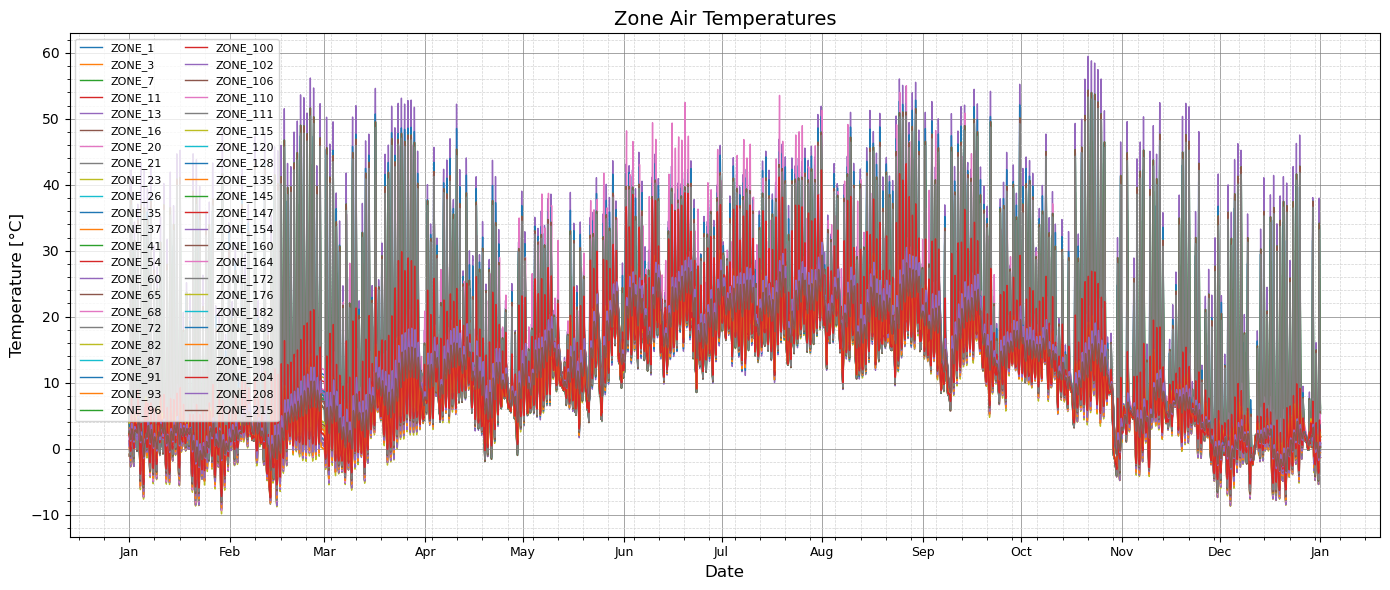

Start:  01/01  00:10:00
End:  12/31  24:00:00


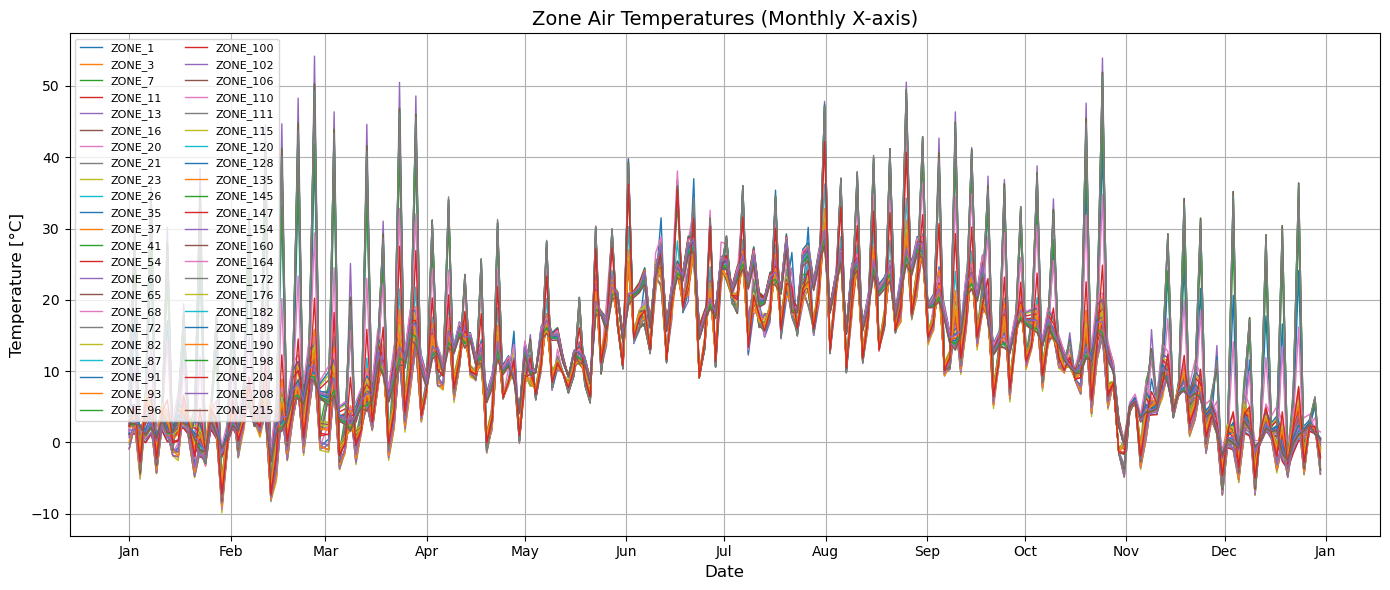

In [27]:
plot_graph_results = True

if plot_graph_results:

    import pandas as pd
    import matplotlib.pyplot as plt
    import re
    import matplotlib.dates as mdates

    results_csv = r'C:\Users\oscar\Desktop\ep_results/eplusout.csv'
    df_eplus = pd.read_csv(results_csv)

    # Auto-detect zone air temperature columns
    zone_temp_pattern = re.compile(r'ZONE_\d+:Zone Air Temperature')
    room_zone_columns = [col for col in df_eplus.columns if zone_temp_pattern.match(col)]

    # Convert and clean timestamps
    df_plot = df_eplus[["Date/Time"] + room_zone_columns].copy()
    df_plot["DateTime"] = pd.to_datetime("2024 " + df_plot["Date/Time"], format="%Y %m/%d %H:%M:%S", errors="coerce")
    df_plot.dropna(subset=["DateTime"], inplace=True)

    # Plot
    plt.figure(figsize=(14, 6))
    for col in room_zone_columns:
        plt.plot(df_plot["DateTime"], df_plot[col], label=col.split(":")[0], linewidth=1)

    # X-axis ticks and formatting
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))  # minor ticks = weekly

    # Activate grid: major and minor
    plt.grid(which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    plt.minorticks_on()

    # Labels and title
    plt.title("Zone Air Temperatures", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Temperature [°C]", fontsize=12)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=10)
    plt.legend(ncol=2, fontsize=8, loc="upper left")
    plt.tight_layout()
    plt.show()

    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    results_csv = r'C:\Users\oscar\Desktop\ep_results\eplusout.csv'
    df = pd.read_csv(results_csv)

    zone_temp_cols = [col for col in df.columns if re.match(r'ZONE_\d+:Zone Air Temperature', col)]

    valid_zone_cols = []
    for col in zone_temp_cols:
        values = df[col]
        if values.notna().sum() > 100 and (values.abs() > 0.1).sum() > 100:
            valid_zone_cols.append(col)

    df_downsampled = df[["Date/Time"] + valid_zone_cols].iloc[::240]

    df_downsampled["DateTime"] = pd.to_datetime("2024 " + df_downsampled["Date/Time"], format="%Y %m/%d %H:%M:%S", errors='coerce')
    df_downsampled = df_downsampled.dropna(subset=["DateTime"])

    print("Start:", df["Date/Time"].iloc[0])
    print("End:", df["Date/Time"].iloc[-1])

    plt.figure(figsize=(14, 6))
    for col in valid_zone_cols:
        plt.plot(df_downsampled["DateTime"], df_downsampled[col], label=col.split(":")[0], linewidth=1)

    plt.title("Zone Air Temperatures (Monthly X-axis)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Temperature [°C]", fontsize=12)

    # Set x-axis to monthly ticks on the 1st
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.legend(ncol=2, fontsize=8, loc="upper left")
    plt.tight_layout()
    plt.show()


OPENSTUDIO GUI FOR VISUAL RESULTS

In [36]:
import pandas as pd
import numpy as np
from shapely import wkt
import plotly.graph_objs as go

# Load geometry and results
df_building = pd.read_csv(r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\first_floor_v13.csv")
df_results = pd.read_csv(r"C:\Users\oscar\Desktop\ep_results\eplusout.csv")

# Clean thematic surface
df_building["thematic_surface"] = df_building["thematic_surface"].astype(str).str.strip().str.lower()
df_building = df_building[df_building["geometry_wkt"].notna() & df_building["parent_id"].notna()]

# Compute average zone temperature
df_long = df_results.melt(id_vars="Date/Time", var_name="zone_var", value_name="temp_C")
df_long["zone_name"] = df_long["zone_var"].str.extract(r'ZONE_(\d+)')[0]
df_long["zone_name"] = "Zone_" + df_long["zone_name"]
avg_temp = df_long.groupby("zone_name")["temp_C"].mean().reset_index()

# Assign zone name to geometry surfaces
df_building["zone_name"] = df_building["parent_id"].apply(lambda x: f"Zone_{int(x)}" if pd.notna(x) else None)

# Join geometry with temperature
df_plot = pd.merge(df_building, avg_temp, on="zone_name", how="left")
df_plot = df_plot[df_plot["temp_C"].notna()]

# Plot each surface with temperature color
fig = go.Figure()
for _, row in df_plot.iterrows():
    try:
        geom = wkt.loads(row["geometry_wkt"])
        polygon = geom.geoms[0] if hasattr(geom, "geoms") else geom
        coords = np.array(polygon.exterior.coords)

        if coords.shape[1] == 2:
            coords = np.hstack([coords, np.zeros((coords.shape[0], 1))])

        fig.add_trace(go.Mesh3d(
            x=coords[:, 0],
            y=coords[:, 1],
            z=coords[:, 2],
            intensity=[row["temp_C"]] * len(coords),
            colorscale="Jet",
            name=row["zone_name"],
            opacity=0.8,
            showscale=True
        ))
    except Exception as e:
        print(f"❌ Skipping surface due to error: {e}")

fig.update_layout(
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    title="3D Visualization of Average Zone Temperature",
    margin=dict(l=0, r=0, t=40, b=0)
)
fig.show()



In [30]:
from pathlib import Path
import pandas as pd
from shapely import wkt
from shapely.wkt import loads as load_wkt
from topologicpy.Vertex import Vertex
from topologicpy.Face import Face
from topologicpy.Cell import Cell
from topologicpy.CellComplex import CellComplex
from topologicpy.Topology import Topology
from topologicpy.Dictionary import Dictionary

# === Load CSV ===
df = pd.read_csv(csv_file)
df["thematic_surface"] = df["thematic_surface"].str.lower().str.strip()
df = df[df["geometry_wkt"].notnull() & df["parent_id"].notnull()]

# Valid thematic surfaces
valid_surfaces = {
    "floor", "ceiling", "external", "external_with_hole",
    "partly_wall", "partly_wall_with_hole", "party_wall"
}
df = df[df["thematic_surface"].isin(valid_surfaces)]

# === Helper Functions ===
def parse_coords(wkt_str):
    try:
        geom = load_wkt(wkt_str)
        if geom.is_empty:
            return []
        if geom.geom_type == "Polygon":
            return [list(geom.exterior.coords)]
        elif geom.geom_type == "MultiPolygon":
            return [list(p.exterior.coords) for p in geom.geoms]
    except Exception as e:
        print(f"❌ WKT parse error: {e}")
    return []

def remove_near_duplicates(coords, tol=1e-6):
    cleaned = []
    for pt in coords:
        if not cleaned or any(abs(pt[i] - cleaned[-1][i]) > tol for i in range(min(len(pt), len(cleaned[-1])))):
            cleaned.append(pt)
    if len(cleaned) >= 3 and cleaned[0] != cleaned[-1]:
        cleaned.append(cleaned[0])
    return cleaned

def is_degenerate(coords, tol=1e-9):
    xs, ys, zs = [], [], []
    for pt in coords:
        x, y = pt[0], pt[1]
        z = pt[2] if len(pt) > 2 else 0
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return (max(xs)-min(xs) < tol or max(ys)-min(ys) < tol or max(zs)-min(zs) < tol)

def safe_vertex(pt):
    x, y = pt[0], pt[1]
    z = pt[2] if len(pt) > 2 else 0
    return Vertex.ByCoordinates(x, y, z)

# === Organize Faces per Room ===
room_faces = {}
room_face_types = {}

for _, row in df.iterrows():
    pid = str(row["parent_id"])
    surface_type = row["thematic_surface"]
    coord_groups = parse_coords(row["geometry_wkt"])

    for coords in coord_groups:
        coords = remove_near_duplicates(coords)
        if len(coords) >= 3:
            try:
                verts = [safe_vertex(c) for c in coords]
                face = Face.ByVertices(verts)
                if face:
                    room_faces.setdefault(pid, []).append(face)
                    room_face_types.setdefault(pid, {}).setdefault(surface_type, []).append(face)
                else:
                    print(f"⚠️ Degenerate face skipped in room {pid}")
            except Exception as e:
                print(f"❌ Face creation error in room {pid}: {e}")
        else:
            print(f"⚠️ Invalid coords skipped in room {pid}")

# === Create Cells ===
room_cells = []

for room_id, faces in room_faces.items():
    face_types = room_face_types.get(room_id, {})
    has_floor = "floor" in face_types
    has_ceiling = "ceiling" in face_types
    if not (has_floor and has_ceiling):
        print(f"⚠️ Room {room_id}: Not enough surfaces (needs floor & ceiling)")
        continue
    if len(faces) >= 4:
        try:
            cell = Cell.ByFaces(faces)
            if cell:
                d = Dictionary.ByKeysValues(["type", "room_id"], ["room", room_id])
                cell = Topology.SetDictionary(cell, d)
                room_cells.append(cell)
                print(f"✅ Room {room_id}: Cell created with {len(faces)} faces.")
            else:
                print(f"❌ Room {room_id}: Cell creation failed")
        except Exception as e:
            print(f"❌ Room {room_id}: Exception during Cell creation: {e}")
    else:
        print(f"⚠️ Room {room_id}: Not enough valid faces to build cell")

# === Assemble CellComplex ===
if room_cells:
    try:
        cc = CellComplex.ByCells(room_cells)
        print(f"✅ CellComplex created with {len(room_cells)} cells.")
    except Exception as e:
        print(f"❌ Error creating CellComplex: {e}")
else:
    print("⚠️ No valid cells created for CellComplex.")

from pathlib import Path
import pandas as pd
from shapely.wkt import loads as load_wkt
from shapely.geometry import Polygon, MultiPolygon
from topologicpy.Vertex import Vertex
from topologicpy.Face import Face
from topologicpy.Wire import Wire
from topologicpy.Cluster import Cluster
from topologicpy.Dictionary import Dictionary
from topologicpy.Topology import Topology
from topologicpy.Plotly import Plotly

print("🧾 DataFrame shape:", df.shape)
print("📌 Columns:", df.columns.tolist())
print("🔍 Sample rows:")
print(df.head(3).to_string())
print("🟡 Raw 'thematic_surface' unique values:")
print(df["thematic_surface"].unique())

df = pd.read_csv(r'C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\filtered_v90_fixed.csv')
df["thematic_surface"] = df["thematic_surface"].astype(str).str.strip().str.lower()

# Better aperture detection
df_apertures = df[
    df["thematic_surface"].str.contains("door|window", case=False, na=False) &
    df["geometry_wkt"].notna() &
    df["geometry_wkt"].str.strip().ne("")
]

print("✅ Aperture entries found:", len(df_apertures))
print(df_apertures[["element_id", "thematic_surface", "geometry_wkt"]].head())

# Force string conversion
df["thematic_surface_str"] = df["thematic_surface"].astype(str)

# Print rows where 'door' or 'window' are in thematic_surface
aperture_debug = df[df["thematic_surface_str"].str.contains("door|window", case=False, na=False)]

print("🧪 Manual aperture debug (should show rows):")
print(aperture_debug[["element_id", "thematic_surface", "geometry_wkt"]])


# === 3. Build Wireframes for Openings ===
aperture_wires = []

for _, row in df_apertures.iterrows():
    try:
        geom = load_wkt(row["geometry_wkt"])
        polygons = [geom] if isinstance(geom, Polygon) else list(geom.geoms)

        for poly in polygons:
            coords = list(poly.exterior.coords)
            coords = [pt if len(pt) == 3 else (*pt, 0) for pt in coords]

            verts = [Vertex.ByCoordinates(*pt) for pt in coords]
            if len(verts) >= 3:
                wire = Wire.ByVertices(verts)
                if wire:
                    d = Dictionary.ByKeysValues(
                        ["type", "id", "parent_id"],
                        [row["thematic_surface"], str(row["element_id"]), str(row["parent_id"])]
                    )
                    wire = Topology.SetDictionary(wire, d)
                    aperture_wires.append(wire)
                else:
                    print(f"⚠️ Skipped invalid wire for element {row['element_id']}")
            else:
                print(f"⚠️ Too few vertices for aperture {row['element_id']}")
    except Exception as e:
        print(f"❌ WKT error for element {row['element_id']}: {e}")

print(f"\n✅ Created {len(aperture_wires)} aperture wireframes")

# === 4. Optional Visualization Cluster ===
if aperture_wires:
    aperture_cluster = Cluster.ByTopologies(aperture_wires)
    aperture_data = Plotly.DataByTopology(aperture_cluster, edgeColor="red", edgeWidth=3)
else:
    aperture_data = []
    print("⚠️ No aperture wireframes created.")

print("🔍 Max csv_line_id:", df["csv_line_id"].max())

from pathlib import Path
import pandas as pd
from shapely import wkt
from shapely.geometry import Polygon, MultiPolygon

from pathlib import Path
from collections import defaultdict, Counter
import pandas as pd
from shapely import wkt
from shapely.geometry import Polygon, MultiPolygon

from topologicpy.Vertex import Vertex
from topologicpy.Face import Face
from topologicpy.Cell import Cell
from topologicpy.Shell import Shell
from topologicpy.CellComplex import CellComplex
from topologicpy.Topology import Topology
from topologicpy.Dictionary import Dictionary
from topologicpy.Cluster import Cluster
from topologicpy.Plotly import Plotly
from topologicpy.EnergyModel import EnergyModel

# === Load CSV and Clean Data ===
csv_path = Path(r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\outputs\jsons\filtered_v90_fixed.csv")
df = pd.read_csv(csv_path)
df["thematic_surface"] = df["thematic_surface"].astype(str).str.strip().str.lower()

# === Room Face Generation ===
valid_surfaces = {"external", "external_with_hole", "partly_wall", "partly_wall_with_hole", "ceiling", "floor"}
room_faces_dict = {}

df_rooms = df[(df["geometry_wkt"].notna()) & (df["thematic_surface"].isin(valid_surfaces)) & df["parent_id"].notna()]
for _, row in df_rooms.iterrows():
    room_id = str(row["parent_id"])
    face_type = "wall" if "wall" in row["thematic_surface"] else row["thematic_surface"]

    geom = wkt.loads(row["geometry_wkt"])
    polys = [geom] if isinstance(geom, Polygon) else list(geom.geoms)

    for poly in polys:
        coords = list(poly.exterior.coords)
        coords = [(*pt, 0) if len(pt) == 2 else pt for pt in coords]
        verts = [Vertex.ByCoordinates(pt[0], pt[1], pt[2]) for pt in coords]


        face = Face.ByVertices(verts)
        if face:
            face = Topology.SetDictionary(face, Dictionary.ByKeysValues(["type"], [face_type]))
            room_faces_dict.setdefault(room_id, []).append(face)

# === Build Cells from Faces ===
room_cells = []
for room_id, faces in room_faces_dict.items():
    if len(faces) >= 4:
        shell = Shell.ByFaces(faces)
        cell = Cell.ByShell(shell)
        if cell:
            cell = Topology.SetDictionary(cell, Dictionary.ByKeysValues(["element_id", "type"], [room_id, "room"]))
            room_cells.append(cell)

# === Extract Aperture Faces (door/window) ===
df_apertures = df[df["thematic_surface"].isin(["door", "window"]) & df["geometry_wkt"].notna()]
aperture_faces = []

for _, row in df_apertures.iterrows():
    geom = wkt.loads(row["geometry_wkt"])
    polys = [geom] if isinstance(geom, Polygon) else list(geom.geoms)

    for poly in polys:
        coords = list(poly.exterior.coords)
        coords = [(*pt, 0) if len(pt) == 2 else pt for pt in coords]
        verts = [Vertex.ByCoordinates(*pt) for pt in coords]
        if len(verts) >= 3:
            face = Face.ByVertices(verts)
            if face:
                face = Topology.SetDictionary(
                    face,
                    Dictionary.ByKeysValues(
                        ["type", "id", "parent_id"],
                        [row["thematic_surface"], str(row["element_id"]), str(row["parent_id"])]
                    )
                )
                aperture_faces.append(face)

# === Subtract Apertures from Cells ===
from collections import defaultdict
apertures_by_room = defaultdict(list)
for face in aperture_faces:
    d = Topology.Dictionary(face)
    pid = Dictionary.ValueAtKey(d, "parent_id")
    if pid:
        apertures_by_room[str(pid)].append(face)

updated_cells = []
for cell in room_cells:
    room_id = Dictionary.ValueAtKey(Topology.Dictionary(cell), "element_id")
    apertures = apertures_by_room.get(room_id, [])
    if apertures:
        diff = Topology.Difference(cell, Cluster.ByTopologies(apertures))
        updated_cells.append(diff if diff else cell)
    else:
        updated_cells.append(cell)

# === Export BREP and Visualize ===
output_brep = Path(r"C:\Users\oscar\OneDrive - Fondazione Bruno Kessler\KUL_GeometricModel\script\brep_filtered_surfaces\building_with_rooms_with_apertures.brep")

if updated_cells:
    cc = CellComplex.ByCells(updated_cells)
    Topology.ExportToBREP(cc, str(output_brep), overwrite=True)
    print(f"✅ Exported CellComplex to {output_brep}")
else:
    print("❌ No cells to export")

# === Plot Rooms + Apertures Together ===
building = Topology.ByBREPPath(str(output_brep))
room_data = Plotly.DataByTopology(building, faceOpacity=0.25)

if aperture_faces:
    aperture_cluster = Cluster.ByTopologies(aperture_faces)
    aperture_data = Plotly.DataByTopology(aperture_cluster, faceColor="red", faceOpacity=1.0)
else:
    aperture_data = []

fig = Plotly.FigureByData(room_data + aperture_data)
fig.show()




✅ Room 1: Cell created with 8 faces.
✅ Room 11: Cell created with 7 faces.
Cell.ByFaces - Error: The operation failed. Returning None.
❌ Room 20: Cell creation failed
✅ Room 54: Cell created with 10 faces.
Cell.ByFaces - Error: The operation failed. Returning None.
❌ Room 65: Cell creation failed
✅ Room 82: Cell created with 8 faces.
✅ Room 91: Cell created with 7 faces.
✅ Room 100: Cell created with 8 faces.
✅ Room 110: Cell created with 10 faces.
✅ Room 120: Cell created with 7 faces.
✅ Room 128: Cell created with 6 faces.
✅ Room 135: Cell created with 9 faces.
✅ Room 145: Cell created with 7 faces.
✅ Room 154: Cell created with 8 faces.
✅ Room 164: Cell created with 7 faces.
✅ Room 172: Cell created with 8 faces.
✅ Room 182: Cell created with 6 faces.
✅ Room 189: Cell created with 7 faces.
✅ Room 198: Cell created with 8 faces.
✅ Room 208: Cell created with 6 faces.
✅ Room 215: Cell created with 6 faces.
✅ CellComplex created with 19 cells.
🧾 DataFrame shape: (183, 9)
📌 Columns: ['c